In [1]:
import pandas as pd
import numpy  as np

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.stats import norm

### Term Paper Synthetic Data Generation

<b>Modelling Probability of Acceptance</b> <br>
If Medical Certificate is Present <br>
&nbsp;&nbsp; Pr [accept | days, mc=True] $\sim \mathcal{N}(0, 10)$ <br>
Else <br>
&nbsp;&nbsp; Pr [accept | days, mc=False] $\sim \mathcal{N}(0, 4)$ <br>
<br>
Flip Probability = 1e-2 (Noise)


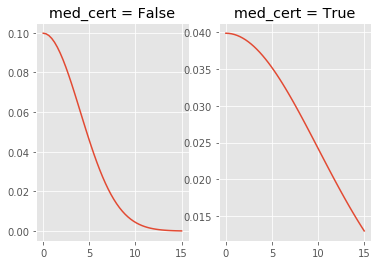

In [3]:
# Visualizing the Model 
x = np.linspace(0.0, 15.0)

plt.subplot(1, 2, 1)
plt.plot(x, norm.pdf(x,0,4))
plt.title('med_cert = False')

plt.subplot(1, 2, 2)
plt.plot(x, norm.pdf(x,0,10))
plt.title('med_cert = True')

plt.show()

In [4]:
term_paper_data = pd.DataFrame([], columns=['days_late', 'medical_certificate', 'accepted'])

In [5]:
threshold = (norm.pdf(0,0,4)/2, norm.pdf(0,0,10)/2)
flip_probability = 1e-2
for days in range(15) :
    for mc in [False, True] :
        if mc :
            acc = norm.pdf(days, 0, 10) > threshold[mc]
        else :
            acc = norm.pdf(days, 0, 4) > threshold[mc]
        
        if np.random.random() < flip_probability : 
            acc = ~acc
        
        tmp = pd.DataFrame([[days, mc, acc]], columns=['days_late', 'medical_certificate', 'accepted'])
        term_paper_data = term_paper_data.append(tmp, ignore_index=True)

In [6]:
term_paper_data.to_csv('term_paper_data.csv', index=False)